In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import folium

### Câu 1. Udemy Courses
a. Đọc dữ liệu, hiển thị thông tin chung

In [36]:
c = pd.read_csv('data/courses.csv')
s = pd.read_csv('data/subjects.csv')

In [37]:
c.shape

(3678, 12)

In [38]:
c.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'id_sub'],
      dtype='object')

In [39]:
c.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,id_sub
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,2
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,2
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,2
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,2
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,2


In [40]:
c.tail()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,id_sub
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,1
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,1
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,1
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,1
3677,297602,Using MODX CMS to Build Websites: A Beginner's...,https://www.udemy.com/using-modx-cms-to-build-...,True,45,901,36,20,Beginner Level,2.0,2014-09-28T19:51:11Z,1


In [41]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  id_sub               3678 non-null   int64  
dtypes: bool(1), float64(1), int64(6), object(4)
memory usage: 262.3+ KB


In [42]:
s.shape

(5, 4)

In [43]:
s.columns

Index(['id', 'subject', 'total', 'dean'], dtype='object')

In [44]:
s.head()

,id,subject,total,dean
0,1,Web Development,1200,Thomas Johnson
1,2,Business Finance,1195,Sophia Laura
2,3,Musical Instruments,680,Joseph Miller
3,4,Graphic Design,603,Jennifer Linda
4,5,Technology,0,Michael \tWilliams


In [45]:
s.tail()

,id,subject,total,dean
0,1,Web Development,1200,Thomas Johnson
1,2,Business Finance,1195,Sophia Laura
2,3,Musical Instruments,680,Joseph Miller
3,4,Graphic Design,603,Jennifer Linda
4,5,Technology,0,Michael \tWilliams


In [46]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       5 non-null      int64 
 1   subject  5 non-null      object
 2   total    5 non-null      int64 
 3   dean     5 non-null      object
dtypes: int64(2), object(2)
memory usage: 184.0+ bytes


b. Xử lý dữ liệu

In [47]:
# Kết dữ liệu 2 bảng thành bảng df

df = pd.merge(c,s,left_on = "id_sub", right_on = "id", how = "inner")
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,id_sub,id,subject,total,dean
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,2,2,Business Finance,1195,Sophia Laura
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,2,2,Business Finance,1195,Sophia Laura
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,2,2,Business Finance,1195,Sophia Laura
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,2,2,Business Finance,1195,Sophia Laura
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,2,2,Business Finance,1195,Sophia Laura


In [48]:
# xóa các cột:

df.drop(['course_id','url','id','id_sub','total'], axis = 1, inplace = True)
df.head()

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,dean
0,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,Sophia Laura
1,Complete GST Course & Certification - Grow You...,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance,Sophia Laura
2,Financial Modeling for Business Analysts and C...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance,Sophia Laura
3,Beginner to Pro - Financial Analysis in Excel ...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance,Sophia Laura
4,How To Maximize Your Profits Trading Options,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance,Sophia Laura


In [49]:
# Tạo cột revenue:

df['revenue'] = df['num_subscribers'] * df['price']
df.head()

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,dean,revenue
0,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,Sophia Laura,429400
1,Complete GST Course & Certification - Grow You...,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance,Sophia Laura,209400
2,Financial Modeling for Business Analysts and C...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance,Sophia Laura,97830
3,Beginner to Pro - Financial Analysis in Excel ...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance,Sophia Laura,232845
4,How To Maximize Your Profits Trading Options,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance,Sophia Laura,255200


In [50]:
# Hiển thị thông tin cột:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_title         3678 non-null   object 
 1   is_paid              3678 non-null   bool   
 2   price                3678 non-null   int64  
 3   num_subscribers      3678 non-null   int64  
 4   num_reviews          3678 non-null   int64  
 5   num_lectures         3678 non-null   int64  
 6   level                3678 non-null   object 
 7   content_duration     3678 non-null   float64
 8   published_timestamp  3678 non-null   object 
 9   subject              3678 non-null   object 
 10  dean                 3678 non-null   object 
 11  revenue              3678 non-null   int64  
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 276.6+ KB


c. Lọc nhóm và tiêu đề

In [51]:
df[(df['subject'] == "Musical Instruments") & (df['course_title'].str.contains("Guitarist", regex = False))]

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,dean,revenue
1798,"7 Ways A Beginner Guitarist Can Sound Better, ...",False,0,4529,193,7,Beginner Level,0.6,2015-12-21T18:50:50Z,Musical Instruments,Joseph Miller,0
1858,Guitar Fretboard Mastery for the Blues Guitarist,True,20,257,6,5,All Levels,1.0,2014-01-16T11:30:07Z,Musical Instruments,Joseph Miller,5140
2010,The Circle of Fifths for Guitarists,True,50,1018,2,5,Intermediate Level,1.5,2016-12-15T21:57:42Z,Musical Instruments,Joseph Miller,50900
2113,The Art of the Blues Shuffle - A Guitarist's G...,True,20,8,0,11,Intermediate Level,1.5,2016-06-26T16:57:13Z,Musical Instruments,Joseph Miller,160


d. Thống kê giá trung bình và doanh thu trung bình của các khóa học theo subject và level, kết quả gợi ý như hình sau, bạn có nhận xét gì với kết quả có được

In [52]:
df_1d = df.groupby(['subject','level']).mean()
df_1d = df_1d[['price','revenue']]
df_1d.columns = ['Avg Price', 'Avg Revenue']
df_1d

Avg Price    Avg Revenue
subject             level                                        
Business Finance    All Levels           75.201149  120811.443966
                    Beginner Level       53.382353   80147.485294
                    Expert Level         95.967742  129994.677419
                    Intermediate Level   66.054688   65395.078125
Graphic Design      All Levels           62.701342  159184.798658
                    Beginner Level       53.477366  109278.724280
                    Expert Level         70.000000    5067.000000
                    Intermediate Level   49.824561   52035.701754
Musical Instruments All Levels           55.978261  139663.731884
                    Beginner Level       43.378378   35228.344595
                    Expert Level         36.428571   37739.285714
                    Intermediate Level   51.039604   40793.069307
Web Development     All Levels           82.526555  667633.907436
                    Beginner Level       68.363171  397559.782609
                    Expert Level        113.666667   76648.333333
                    Intermediate Level   71.259259  253906.888889

**Nhận xét**: Price cao nhất nằm ở Exper level của môn Web Development, Price thấp nhất cũng là Expert level của môn Musical Instruments. Về revenue, ghi nhận cao nhất ở All Levels môn Web Development, thấp nhất ở môn Graphic Design, Exper level

e. Vẽ biểu đồ pie chart cho biết tỷ lệ các khóa học Free và Paid trên Udemy

Text(0.5, 1.0, 'Paid courses')

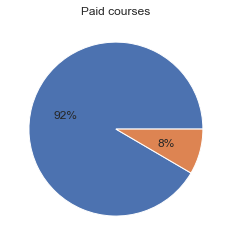

In [53]:
df_1e = df[['is_paid']]
plt.pie(df['is_paid'].value_counts(), autopct = "%1.0f%%")
plt.title("Paid courses")


f. Vẽ biểu đồ thống kê số lượng khóa học theo từng level, có phân loại (miễn phí và trả phí) như hình sau,
rồi cho nhận xét

c:\users\asus\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


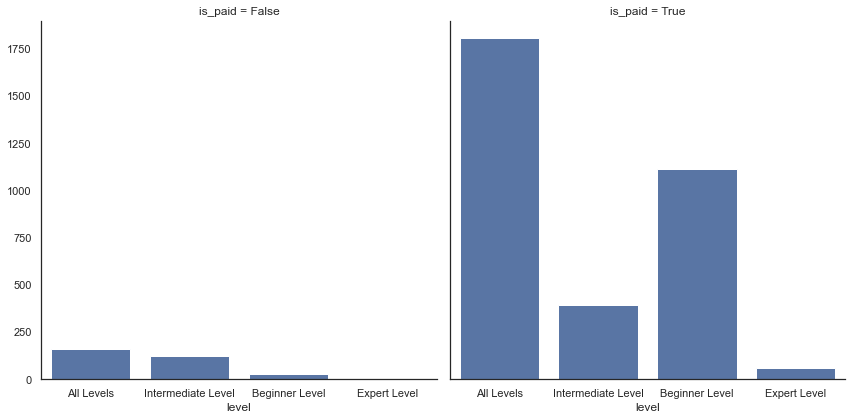

In [54]:
g = sns.FacetGrid(data = df, col = "is_paid", height = 6, aspect = 1, palette = sns.color_palette("Spectral"))
g.map(sns.countplot, "level")

**Nhận xét**: Đa số các khóa học được đăng ký đều trả phí. All levels và expert level là 2 level đăng kí nhiều nhất và ít nhất ở cả 2 loại khóa học. 

g) Vẽ biểu đồ phân phối tần suất các khóa học theo học phí (price) và biểu đồ box plot của price, kết quả gợi
ý như hình sau và cho nhận xét :

c:\users\asus\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\asus\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

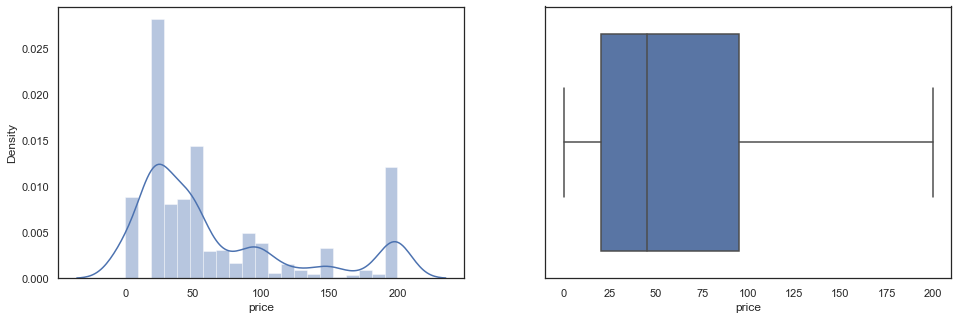

In [55]:
f, a = plt.subplots(1,2, figsize = (16,5))
sns.distplot(df["price"], ax = a[0])
sns.boxplot(df['price'], ax = a[1])

**Nhận xét**: Theo histogram và kdeplot: range từ $0 đến $200, đồ thị có 2 đỉnh cao đáng kể nằm ở $20 và gần $200 <br>
Theo box plot: Đa số các khóa học có giá dao động từ 25 đến 100 đô (phân vị thứ nhất và thứ 3)

h) Vẽ biểu đồ thể hiện boxplot giá khóa học giữa các thể loại và cho nhận xét (0.75 điểm)

<AxesSubplot:xlabel='price', ylabel='subject'>

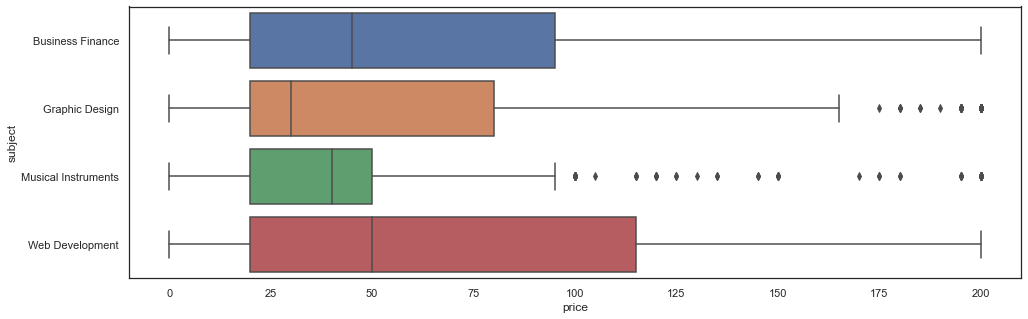

In [56]:
sns.set(style = "white")
plt.figure(figsize = (16,5))
sns.boxplot(data = df, x = "price", y ="subject")

**Nhận xét**: Các khóa học có giá trị trung vị giá cả gần như nhau (từ $30 đến $50). Tuy nhiên, đa số các khóa học mảng Graphic và Music có giá thấp, nên xuất hiện 1 vài outliers. Business và Web Dev có mức giá trải đều hơn từ 0 đến 200 nên không xuất hiện outlier

<AxesSubplot:xlabel='num_reviews', ylabel='revenue'>

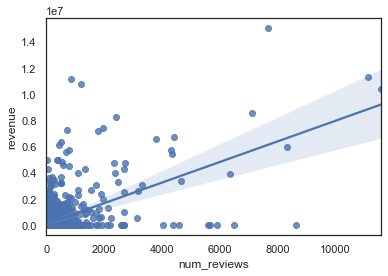

In [57]:
df_1i = df[df['num_reviews'] < 15000]
sns.regplot(data = df_1i, y = "revenue", x = "num_reviews")

**Nhận xét**: lượt review và doanh thu có tương quan thuận (càng nhiều reviews thì càng nhiều revenue, ngoài trừ 1 số phim free nên dù có reviews hơn 8000 nhưng doanh thu vẫn bằng 0). đa số các phim có lượt reviews dưới 2000 và doanh thu dưới $4tr)

j) Tạo biểu đồ Wordcloud dựa trên course_title với subject là Musical Instruments, có kết quả gợi ý
như sau

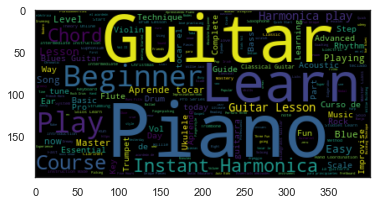

In [58]:
text = " ".join(df[df['subject'] == "Musical Instruments"]['course_title'])
text

wc = WordCloud(
background_color = "black",
stopwords = set(STOPWORDS))
wc.generate(text)

plt.imshow(wc, interpolation = "bilinear")

k) Cho tập tin hình ảnh piano.jpg, hãy tạo biểu đồ có kết quả gợi ý như hình sau : 

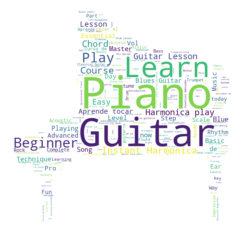

In [59]:
from PIL import Image

wc_mask = np.array(Image.open('data/piano.jpg'))

plt.imshow(wc_mask, interpolation = "bilinear")
plt.axis('off')

wc1 = WordCloud(
background_color = "white",
stopwords = set(STOPWORDS),
mask = wc_mask)

wc1.generate(text)

plt.imshow(wc1, interpolation = "bilinear")

### Câu 2. Trực quan hóa dữ liệu bản đồ
a. Đọc dữ liệu, hiển thị thông tin chung của dữ liệu

In [60]:
un = pd.read_csv("data/us_unemployment_2016.csv")
states = r"data/us-states.json"

In [61]:
un.head()

,Year,Month,County,Rate,State,State_name
0,2016,February,Abbeville County,6.1,SC,South Carolina
1,2016,October,Abbeville County,4.9,SC,South Carolina
2,2016,March,Abbeville County,6.3,SC,South Carolina
3,2016,August,Abbeville County,6.1,SC,South Carolina
4,2016,May,Abbeville County,5.4,SC,South Carolina


In [62]:
un.tail()

,Year,Month,County,Rate,State,State_name
34325,2016,September,Georgia,2.6,GA,Georgia
34326,2016,April,Georgia,2.8,GA,Georgia
34327,2016,December,Georgia,2.7,GA,Georgia
34328,2016,July,Georgia,2.8,GA,Georgia
34329,2016,November,Georgia,2.8,GA,Georgia


In [63]:
un.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34330 entries, 0 to 34329
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        34330 non-null  int64  
 1   Month       34330 non-null  object 
 2   County      34330 non-null  object 
 3   Rate        34330 non-null  float64
 4   State       34330 non-null  object 
 5   State_name  34330 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.0+ MB


In [64]:
un.describe()

,Year,Rate
count,34330.0,34330.000000
mean,2016.0,5.159167
std,0.0,1.991732
min,2016.0,1.300000
25%,2016.0,3.800000
50%,2016.0,4.800000
75%,2016.0,6.100000
max,2016.0,26.900000


b. Hiển thị tỷ lệ thất nghiệp trung bình các tháng trong năm 2016 rồi nhận xét

<AxesSubplot:xlabel='Month', ylabel='Rate'>

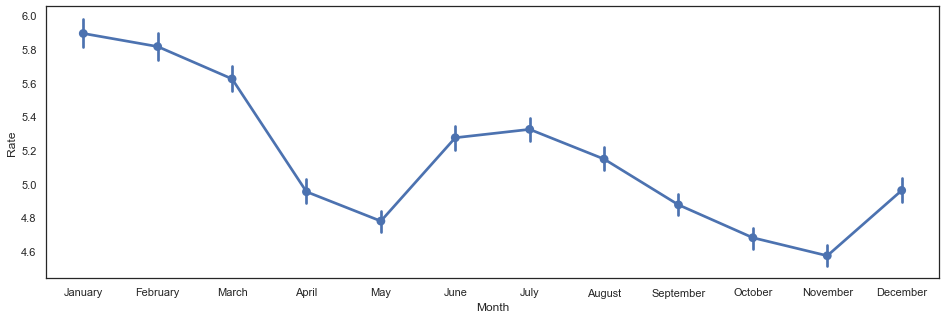

In [65]:
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.figure(figsize = (16,5))
sns.pointplot(data = un, x = "Month", y = "Rate", order = month)


**Nhận xét**: tỉ lệ thất nghiệp đạt 2 đỉnh trong năm vào mùa xuân và mùa thu, mùa xuân có tỉ lệ cao nhất với tháng 1 (gần 5.9%), tỉ lệ thất nghiệp thấp nhất vào tháng 11 với 4.6%

c) Tạo bản đồ với center là Mỹ và zoom level (zoom_start=5) gợi ý như hình sau 

In [66]:
us_lat = 39.961951
us_long = -102.277941
us_map = folium.Map(location = [us_lat, us_long], zoom_start = 5)
us_map

d) Nhóm dữ liệu State và tính trung bình (mean) theo Unemployment_Rate

In [67]:
df_2d = un.groupby('State').Rate.mean().reset_index()
df_2d.head()

,State,Rate
0,AL,6.773756
1,AR,4.656667
2,AZ,7.732778
3,CA,6.920219
4,CO,3.416146


Sau đó tạo choropleth map theo Unemployment_Rate của từng tiểu bang

In [68]:
folium.Choropleth(
    geo_data=states,
    data=df_2d,
    columns=['State', 'Rate'],
    key_on='feature.id',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Unemployment Rate in US'
).add_to(us_map)

us_map